In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)

# Set the seed value 415
np.random.seed(415)


In [53]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


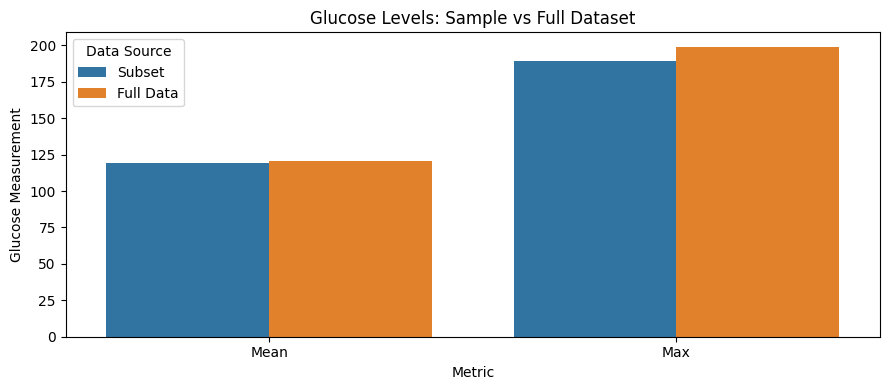

In [54]:
# Draw a subset of 25 records randomly
subset = df.sample(25)

# Calculate stats for subset
avg_glucose_subset = subset['Glucose'].mean()
peak_glucose_subset = subset['Glucose'].max()

# Calculate stats for full dataset
avg_glucose_full = df['Glucose'].mean()
peak_glucose_full = df['Glucose'].max()

# Prepare data for plotting
metrics_data = pd.DataFrame({
    'Statistic': ['Mean', 'Mean', 'Max', 'Max'],
    'Source': ['Subset', 'Full Data', 'Subset', 'Full Data'],
    'Glucose Level': [avg_glucose_subset, avg_glucose_full, peak_glucose_subset, peak_glucose_full]
})

# Plotting side-by-side bars using seaborn
plt.figure(figsize=(9, 4))
sns.barplot(data=metrics_data, x='Statistic', y='Glucose Level', hue='Source')
plt.title('Glucose Levels: Sample vs Full Dataset')
plt.ylabel('Glucose Measurement')
plt.xlabel('Metric')
plt.legend(title='Data Source')
plt.tight_layout()
plt.show()

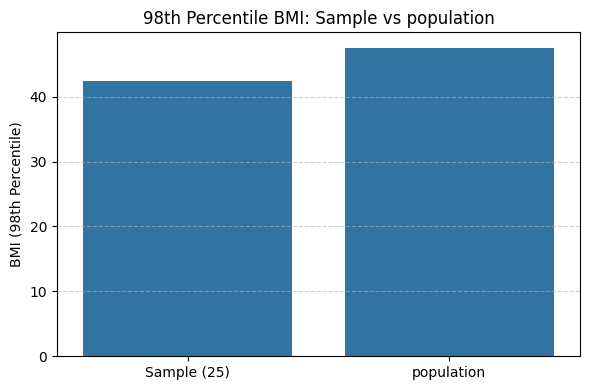

In [61]:
# Draw a random fixed sample of 25 records
bmi_sample = df.sample(n=25)

# Compute 98th percentile for sample and population
sample_p98_bmi = np.percentile(bmi_sample['BMI'], 98)
overall_p98_bmi = np.percentile(df['BMI'], 98)

# Assemble data for plotting
bmi_percentile_data = pd.DataFrame({
    'Group': ['Sample (25)', 'population'],
    'Percentile_98_BMI': [sample_p98_bmi, overall_p98_bmi]
})

# Plot the results
plt.figure(figsize=(6, 4))
sns.barplot(data=bmi_percentile_data, x='Group', y='Percentile_98_BMI')
plt.title('98th Percentile BMI: Sample vs population')
plt.ylabel('BMI (98th Percentile)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


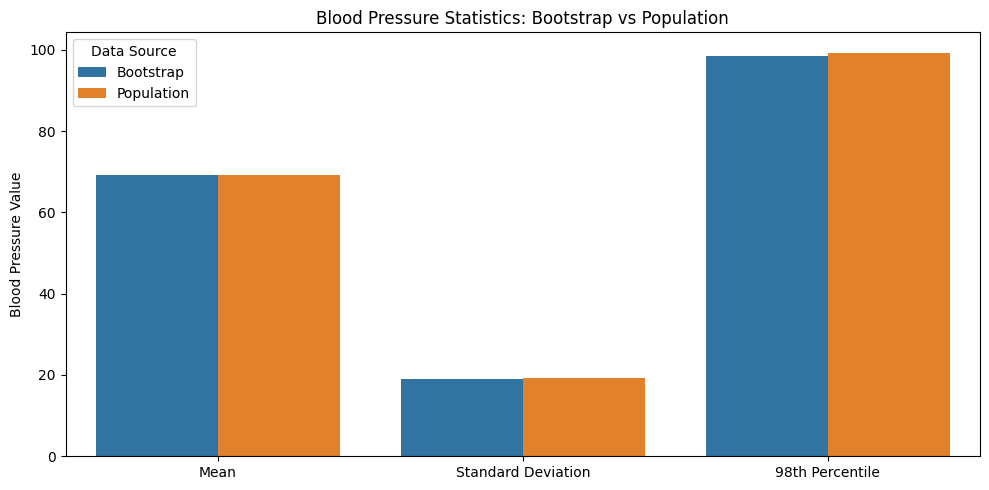

In [59]:
# Initialize lists to collect bootstrap metrics
bp_mean_samples = []
bp_std_samples = []
bp_p98_samples = []

# Bootstrap sampling (500 iterations)
for _ in range(500):
    resample = df.sample(n=150, replace=True)
    bp_values = resample['BloodPressure']
    bp_mean_samples.append(bp_values.mean())
    bp_std_samples.append(bp_values.std())
    bp_p98_samples.append(np.percentile(bp_values, 98))

# Compute aggregated bootstrap results
bp_mean_avg = np.mean(bp_mean_samples)
bp_std_avg = np.mean(bp_std_samples)
bp_98th_avg = np.mean(bp_p98_samples)

# Actual population stats
bp_mean_pop = df['BloodPressure'].mean()
bp_std_pop = df['BloodPressure'].std()
bp_98th_pop = np.percentile(df['BloodPressure'], 98)

# Prepare data for chart
chart_df = pd.DataFrame({
    'Metric': ['Mean', 'Standard Deviation', '98th Percentile'] * 2,
    'Type': ['Bootstrap'] * 3 + ['Population'] * 3,
    'Value': [bp_mean_avg, bp_std_avg, bp_98th_avg, bp_mean_pop, bp_std_pop, bp_98th_pop]
})

# Plot grouped bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=chart_df, x='Metric', y='Value', hue='Type')
plt.title('Blood Pressure Statistics: Bootstrap vs Population')
plt.ylabel('Blood Pressure Value')
plt.xlabel('')
plt.legend(title='Data Source')
plt.tight_layout()
plt.show()


In [60]:
print("Glucose Statistics:")
print(f"  Full Dataset - Mean Glucose: {avg_glucose_full:.2f}")
print(f"  Sample (25 rows) - Mean Glucose: {avg_glucose_subset:.2f}")
print(f"  Full Dataset - Max Glucose: {peak_glucose_full}")
print(f"  Sample (25 rows) - Max Glucose: {peak_glucose_subset}")

print("\nBMI 98th Percentile:")
print(f"  Full Dataset: {overall_p98_bmi:.2f}")
print(f"  Sample (25 rows): {sample_p98_bmi:.2f}")

print("\nBlood Pressure Statistics (Bootstrap vs Population):")
print(f"  Bootstrap Avg of Means: {bp_mean_avg:.2f}")
print(f"  Population Mean: {bp_mean_pop:.2f}")
print(f"  Bootstrap Avg of Std Devs: {bp_std_avg:.2f}")
print(f"  Population Std Dev: {bp_std_pop:.2f}")
print(f"  Bootstrap Avg of 98th Percentiles: {bp_98th_avg:.2f}")
print(f"  Population 98th Percentile: {bp_98th_pop:.2f}")



Glucose Statistics:
  Full Dataset - Mean Glucose: 120.89
  Sample (25 rows) - Mean Glucose: 119.44
  Full Dataset - Max Glucose: 199
  Sample (25 rows) - Max Glucose: 189

BMI 98th Percentile:
  Full Dataset: 47.53
  Sample (25 rows): 47.68

Blood Pressure Statistics (Bootstrap vs Population):
  Bootstrap Avg of Means: 69.29
  Population Mean: 69.11
  Bootstrap Avg of Std Devs: 19.13
  Population Std Dev: 19.36
  Bootstrap Avg of 98th Percentiles: 98.46
  Population 98th Percentile: 99.32
